In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/kidneyData.csv
/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (3178).jpg
/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (3561).jpg
/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (900).jpg
/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1148).jpg
/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (268).jpg
/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-S

In [76]:
print('a')

a


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Model,Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model, Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D

In [7]:
batch_size = 32
img_height = 224
img_width = 224

In [8]:
data_dir='/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone'

train=tf.keras.utils.image_dataset_from_directory(data_dir,image_size=(img_height,img_width),
                                                validation_split=0.1,
                                                subset='training',seed=123)
val=tf.keras.utils.image_dataset_from_directory(data_dir,image_size=(img_height,img_width),
                                                validation_split=0.2,
                                                subset='validation',seed=123)

Found 12446 files belonging to 4 classes.
Using 11202 files for training.
Found 12446 files belonging to 4 classes.
Using 2489 files for validation.


In [9]:
label_to_class_name = dict(zip(range(len(train.class_names)), train.class_names))
label_to_class_name

{0: 'Cyst', 1: 'Normal', 2: 'Stone', 3: 'Tumor'}

In [10]:
for image_batch, labels_batch in train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(32, 224, 224, 3)
(32,)


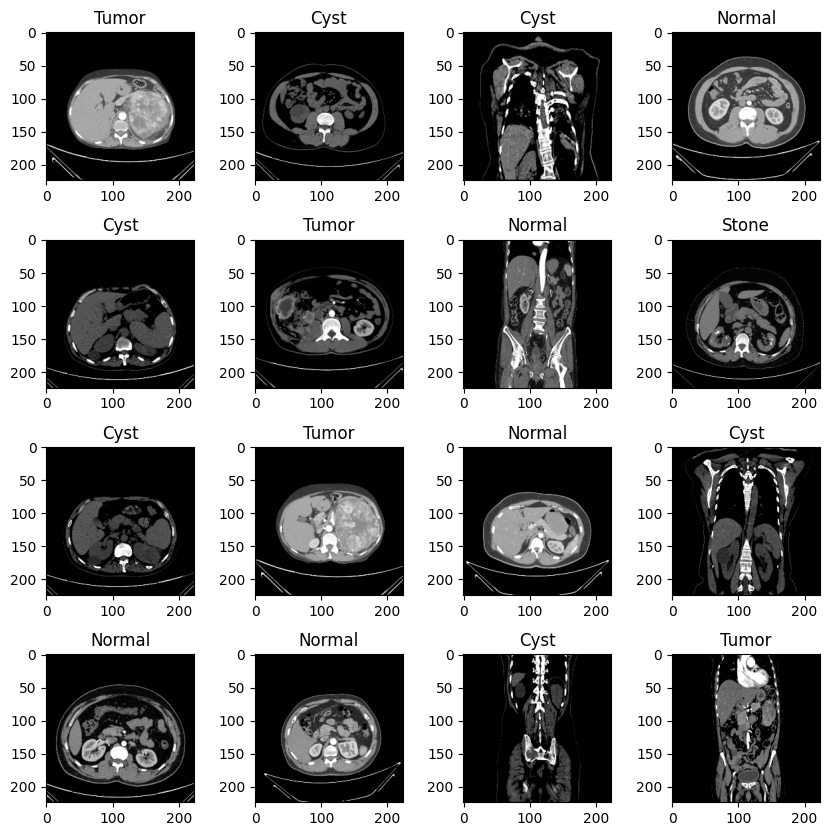

In [11]:
data_iterator = train.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
for i in range(4):  
    for j in range(4):  
        index = i * 4 + j  
        ax[i, j].imshow(batch[0][index].astype(int))
        ax[i, j].set_title(label_to_class_name[batch[1][index]])
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

In [12]:
train=train.map(lambda x,y:(x/255,y))
val=val.map(lambda x,y:(x/255,y))

In [13]:
AUTOTUNE = tf.data.AUTOTUNE

train = train.cache().prefetch(buffer_size=AUTOTUNE)
val = val.cache().prefetch(buffer_size=AUTOTUNE)

**VGG**

In [86]:
# VGG_model = Sequential()

# pretrained_model= tf.keras.applications.VGG16(include_top=False, input_shape=(150,150,3), pooling='max',classes=4, weights='imagenet')


# VGG_model.add(pretrained_model)
# VGG_model.add(Flatten())
# VGG_model.add(Dense(512, activation='relu'))
# VGG_model.add(BatchNormalization())  # Batch Normalization layer
# VGG_model.add(Dropout(0.5))

# VGG_model.add(Dense(4, activation='softmax'))
# pretrained_model.trainable=False

from tensorflow.keras.applications import VGG16
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Flatten, Dense, GlobalAveragePooling2D, Dropout, BatchNormalization


VGG_model = VGG16(input_shape=(224, 224, 3), weights='imagenet', include_top=False)


for layer in VGG_model.layers:
    layer.trainable = True


x = GlobalAveragePooling2D()(VGG_model.output)
x = Dense(128, activation='relu', kernel_regularizer=l2(1e-4))(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)  
x = Dense(64, activation='relu')(x) 
x = Dropout(0.3)(x) 
output = Dense(4, activation='softmax')(x)


model = Model(inputs=VGG_model.input, outputs=output)


In [87]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [88]:
model.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [89]:
epochs=15
history = model.fit(
  train,
  validation_data=val,
  epochs=epochs
)

Epoch 1/15
351/351 [==============================] - 83s 218ms/step - loss: 1.0511 - accuracy: 0.5938 - val_loss: 7778287.5000 - val_accuracy: 0.2961
Epoch 2/15
351/351 [==============================] - 75s 215ms/step - loss: 0.7976 - accuracy: 0.6899 - val_loss: 0.9352 - val_accuracy: 0.6722
Epoch 3/15
351/351 [==============================] - 75s 214ms/step - loss: 0.6457 - accuracy: 0.7485 - val_loss: 1.3529 - val_accuracy: 0.7967
Epoch 4/15
351/351 [==============================] - 75s 214ms/step - loss: 0.5307 - accuracy: 0.7913 - val_loss: 3.4415 - val_accuracy: 0.8164
Epoch 5/15
351/351 [==============================] - 75s 214ms/step - loss: 0.4561 - accuracy: 0.8227 - val_loss: 4.0035 - val_accuracy: 0.8951
Epoch 6/15
351/351 [==============================] - 75s 214ms/step - loss: 0.3654 - accuracy: 0.8588 - val_loss: 5.0993 - val_accuracy: 0.7087
Epoch 7/15
351/351 [==============================] - 75s 214ms/step - loss: 0.3340 - accuracy: 0.8729 - val_loss: 7.6111 - 

In [90]:
history_df = pd.DataFrame(history.history)
history_df.to_csv('VGG_training.csv', index=False)

In [91]:
VGG_model.save('VGG_model.h5')

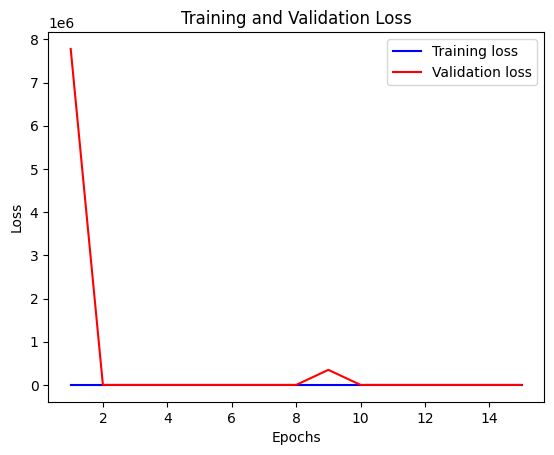

In [92]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

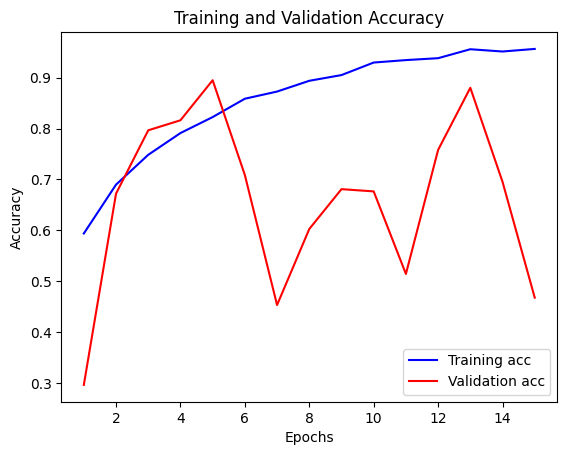

In [93]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf


In [95]:
import pickle
from sklearn.metrics import confusion_matrix
import tensorflow as tf
predictions = model.predict(val)

true_labels = np.concatenate([y for x, y in val], axis=0)

cm = confusion_matrix(true_labels, np.argmax(predictions, axis=1))

with open('confusion_matrix_VGG.pkl', 'wb') as f:
    pickle.dump(cm, f)


78/78 [==============================] - 5s 62ms/step


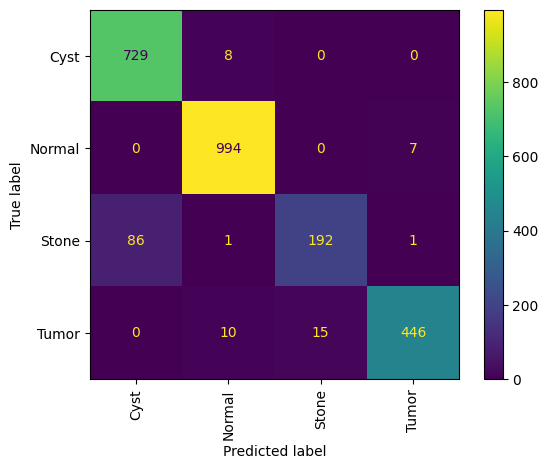

In [96]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

with open('confusion_matrix.pkl', 'rb') as f:
    cm = pickle.load(f)

class_names = ['Cyst', 'Normal', 'Stone', 'Tumor']  

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='viridis', xticks_rotation='vertical', values_format='d')

plt.show()


In [97]:
# img = cv2.imread('/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1).jpg')
# plt.imshow(img)
# plt.show()
# resize = tf.image.resize(img, (150,150))
# yhat = model.predict(np.expand_dims(resize/255, 0))
# max_index = np.argmax(yhat)
# label_to_class_name[max_index]

**MOBILENET**

In [98]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.regularizers import l2
input_shape = (224, 224, 3)
MobileNetV2_model = MobileNetV2(input_shape=input_shape, weights='imagenet', include_top=False)

for _ in range(8):
    MobileNetV2_model.layers.pop()
for layer in MobileNetV2_model.layers:
    layer.trainable = True

x = GlobalAveragePooling2D()(MobileNetV2_model.output)
x = Dense(512, activation='relu', kernel_regularizer=l2(1e-4))(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(1e-4))(x)
output = Dense(4, activation='softmax')(x)

mobile_net = Model(inputs=MobileNetV2_model.input, outputs=output)

In [99]:
mobile_net.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [100]:
# mobile_net.summary()


In [101]:
epochs=15
history = mobile_net.fit(
  train,
  validation_data=val,
  epochs=epochs
)

Epoch 1/15
351/351 [==============================] - 59s 91ms/step - loss: 0.2908 - accuracy: 0.9362 - val_loss: 9.0495 - val_accuracy: 0.4247
Epoch 2/15
351/351 [==============================] - 31s 88ms/step - loss: 0.1603 - accuracy: 0.9738 - val_loss: 2.9503 - val_accuracy: 0.7601
Epoch 3/15
351/351 [==============================] - 31s 88ms/step - loss: 0.1023 - accuracy: 0.9863 - val_loss: 2.3531 - val_accuracy: 0.5609
Epoch 4/15
351/351 [==============================] - 31s 88ms/step - loss: 0.0921 - accuracy: 0.9867 - val_loss: 3.0057 - val_accuracy: 0.6906
Epoch 5/15
351/351 [==============================] - 31s 88ms/step - loss: 0.0742 - accuracy: 0.9864 - val_loss: 14.6116 - val_accuracy: 0.3210
Epoch 6/15
351/351 [==============================] - 31s 88ms/step - loss: 0.0741 - accuracy: 0.9863 - val_loss: 1.9716 - val_accuracy: 0.8043
Epoch 7/15
351/351 [==============================] - 31s 88ms/step - loss: 0.0401 - accuracy: 0.9934 - val_loss: 47.9839 - val_accurac

In [102]:
history_df = pd.DataFrame(history.history)
history_df.to_csv('MobileNet_training.csv', index=False)
mobile_net.save('MobileNet_model.h5')

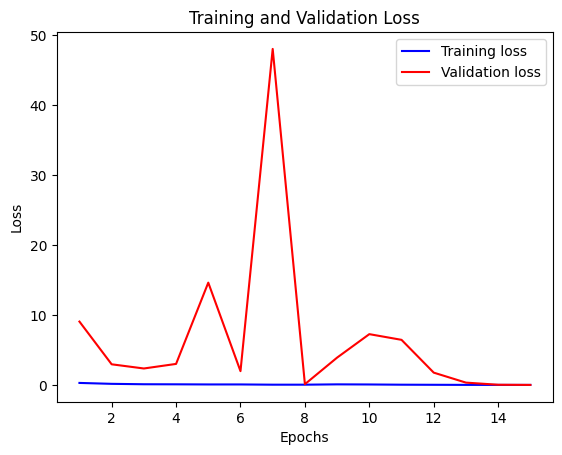

In [103]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

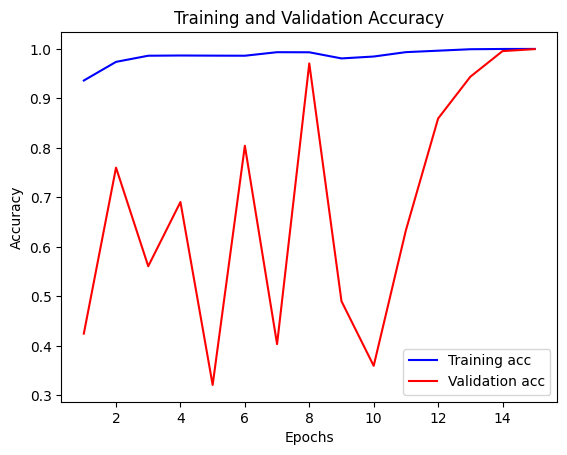

In [104]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [105]:
import pickle
from sklearn.metrics import confusion_matrix
import tensorflow as tf


predictions = mobile_net.predict(val)

true_labels = np.concatenate([y for x, y in val], axis=0)

cm = confusion_matrix(true_labels, np.argmax(predictions, axis=1))

with open('MobileNet_confusion_matrix.pkl', 'wb') as f:
    pickle.dump(cm, f)


78/78 [==============================] - 3s 25ms/step


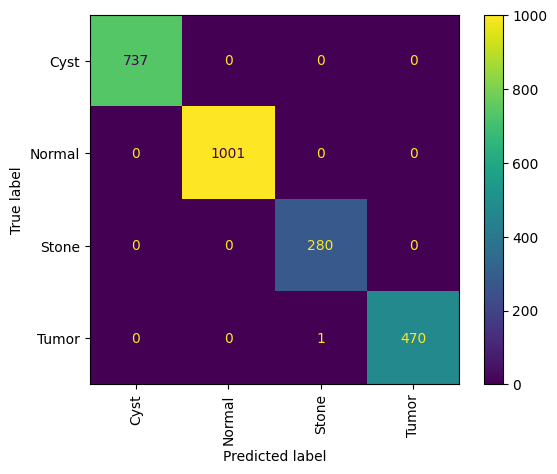

In [106]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

with open('MobileNet_confusion_matrix.pkl', 'rb') as f:
    cm = pickle.load(f)

class_names = ['Cyst', 'Normal', 'Stone', 'Tumor']  

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='viridis', xticks_rotation='vertical', values_format='d')

plt.show()


In [107]:
# img = cv2.imread('/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1).jpg')
# plt.imshow(img)
# plt.show()
# resize = tf.image.resize(img, (150,150))
# yhat = mobile_net.predict(np.expand_dims(resize/255, 0))
# max_index = np.argmax(yhat)
# label_to_class_name[max_index]

**ResNet**

In [14]:
# import tensorflow as tf
# from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.models import Sequential


# resnet_model = ResNet50(input_shape=input_shape, weights=weights, include_top=False)
        
# for layer in resnet_model.layers:
#     layer.trainable = True

# x = GlobalAveragePooling2D()(resnet_model.output)
# x = Dense(512, activation='relu', kernel_regularizer=l2(1e-4))(x)
# x = Dropout(0.5)(x)
# output = Dense(num_classes, activation='softmax')(x)

# resnet_net = Model(inputs=resnet_model.input, outputs=output)



from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model

input_shape = (224, 224, 3)
num_classes = 4 


ResNet_model = ResNet50(input_shape=input_shape, weights='imagenet', include_top=False)

for layer in ResNet_model.layers:
    layer.trainable = True

x = GlobalAveragePooling2D()(ResNet_model.output)
x = Dense(128, activation='relu', kernel_regularizer=l2(1e-4))(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=ResNet_model.input, outputs=output)


94765736/94765736 [==============================] - 0s 0us/step


In [15]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
epochs=15
history = model.fit(
  train,
  validation_data=val,
  epochs=epochs
)

Epoch 1/15
351/351 [==============================] - 116s 195ms/step - loss: 0.3324 - accuracy: 0.8985 - val_loss: 3.4233 - val_accuracy: 0.1892
Epoch 2/15
351/351 [==============================] - 63s 180ms/step - loss: 0.0982 - accuracy: 0.9787 - val_loss: 6.8423 - val_accuracy: 0.2961
Epoch 3/15
351/351 [==============================] - 63s 180ms/step - loss: 0.0966 - accuracy: 0.9788 - val_loss: 0.9767 - val_accuracy: 0.7642
Epoch 4/15
351/351 [==============================] - 63s 180ms/step - loss: 0.0666 - accuracy: 0.9865 - val_loss: 0.0182 - val_accuracy: 0.9996
Epoch 5/15
351/351 [==============================] - 63s 180ms/step - loss: 0.0302 - accuracy: 0.9960 - val_loss: 0.3095 - val_accuracy: 0.9281
Epoch 6/15
351/351 [==============================] - 63s 180ms/step - loss: 0.1055 - accuracy: 0.9751 - val_loss: 0.8759 - val_accuracy: 0.8626
Epoch 7/15
351/351 [==============================] - 63s 180ms/step - loss: 0.0220 - accuracy: 0.9974 - val_loss: 0.0600 - val_a

In [17]:
history_df = pd.DataFrame(history.history)
history_df.to_csv('ResNet_training.csv', index=False)
model.save('ResNet_model.h5')

In [18]:
import pickle
from sklearn.metrics import confusion_matrix
import tensorflow as tf

# Assuming you have a model 'model' and a test dataset 'test_dataset'

# Make predictions using your model
predictions = model.predict(val)

# Get the true labels from the test dataset
true_labels = np.concatenate([y for x, y in val], axis=0)

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, np.argmax(predictions, axis=1))

# Save the confusion matrix in pkl format
with open('ResNet_confusion_matrix.pkl', 'wb') as f:
    pickle.dump(cm, f)


78/78 [==============================] - 5s 53ms/step


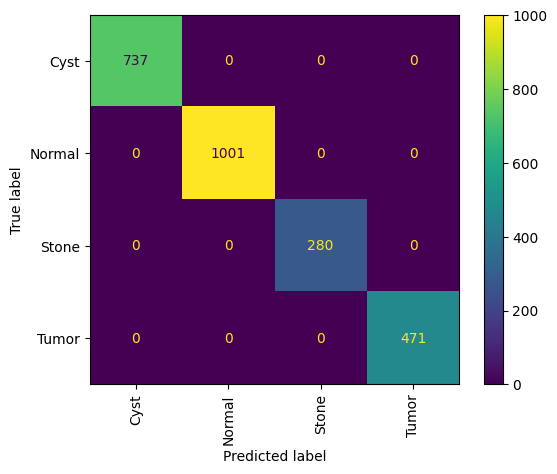

In [19]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Load the saved confusion matrix
with open('ResNet_confusion_matrix.pkl', 'rb') as f:
    cm = pickle.load(f)

# Define class names (assuming you have them)
class_names = ['Cyst', 'Normal', 'Stone', 'Tumor']   # Replace with your actual class names

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='viridis', xticks_rotation='vertical', values_format='d')

# Show the confusion matrix plot
plt.show()


In [ ]:
# img = cv2.imread('/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1).jpg')
# plt.imshow(img)
# plt.show()
# resize = tf.image.resize(img, (150,150))
# yhat = model.predict(np.expand_dims(resize/255, 0))
# max_index = np.argmax(yhat)
# label_to_class_name[max_index]

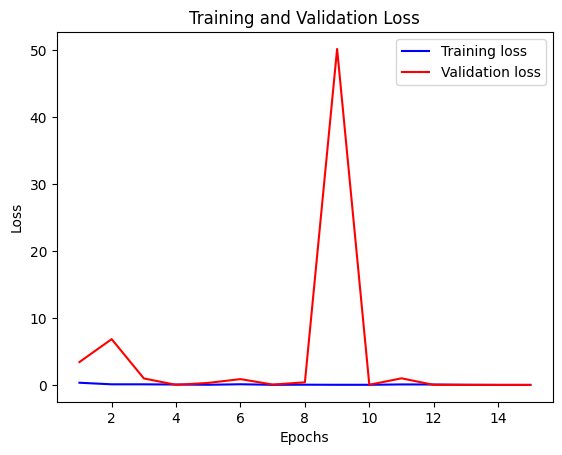

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

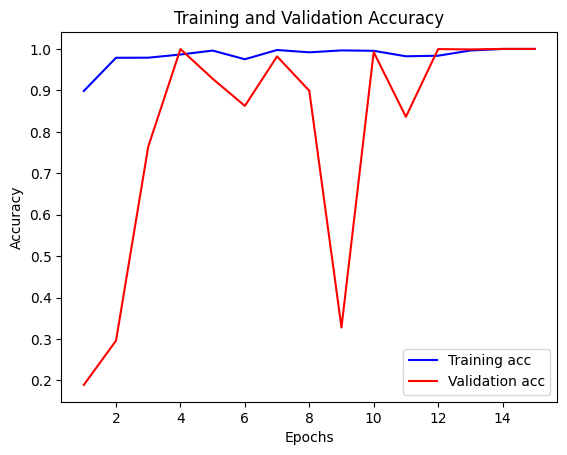

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()